Import base librairies (more later)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import sys

# First contact with the data
Load and inspect the data

In [2]:
df = pd.read_csv('../data/happiness.csv')

In [3]:
df

country      region  year  score      gdp   family  \
0                 Switzerland      Europe  2015  7.587  1.39651  1.34951   
1                     Iceland      Europe  2015  7.561  1.30232  1.40223   
2                     Denmark      Europe  2015  7.527  1.32548  1.36058   
3                      Norway      Europe  2015  7.522  1.45900  1.33095   
4                      Canada  USA/Canada  2015  7.427  1.32629  1.32261   
..                        ...         ...   ...    ...      ...      ...   
707                     Yemen        Asia  2019  3.380  0.28700  1.16300   
708                    Rwanda      Africa  2019  3.334  0.35900  0.71100   
709                  Tanzania      Africa  2019  3.231  0.47600  0.88500   
710               Afghanistan        Asia  2019  3.203  0.35000  0.51700   
711  Central African Republic      Africa  2019  3.083  0.02600  0.00000   

      health  freedom  generosity  
0    0.94143  0.66557     0.29678  
1    0.94784  0.62877     0.43630  
2    0.87464  0.64938     0.34139  
3    0.88521  0.66973     0.34699  
4    0.90563  0.63297     0.45811  
..       ...      ...         ...  
707  0.46300  0.14300     0.10800  
708  0.61400  0.55500     0.21700  
709  0.49900  0.41700     0.27600  
710  0.36100  0.00000     0.15800  
711  0.10500  0.22500     0.23500  

[712 rows x 9 columns]

In [4]:
df.describe()

year       score         gdp      family      health  \
count   712.000000  712.000000  712.000000  712.000000  712.000000   
mean   2016.983146    5.384433    0.927765    1.084706    0.618347   
std       1.421058    1.127515    0.398686    0.330334    0.241488   
min    2015.000000    2.693000    0.000000    0.000000    0.000000   
25%    2016.000000    4.511250    0.631888    0.877478    0.466158   
50%    2017.000000    5.328000    0.990357    1.128175    0.652632   
75%    2018.000000    6.227000    1.230653    1.341106    0.805084   
max    2019.000000    7.769000    2.096000    1.644000    1.141000   

          freedom  generosity  
count  712.000000  712.000000  
mean     0.410976    0.212137  
std      0.152395    0.115306  
min      0.000000    0.000000  
25%      0.310890    0.127045  
50%      0.430770    0.199319  
75%      0.531000    0.273473  
max      0.724000    0.611705

All the zeros are actually missing data. Replace them by NaNs.

In [5]:
df_na = df.copy()
for col in ('gdp', 'family', 'health', 'freedom', 'generosity'):
    df_na.loc[df[col]==0, col] = np.nan

A few basic plots

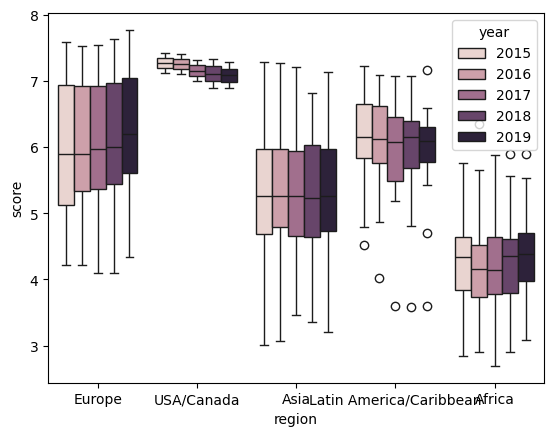

In [6]:
sns.boxplot(df_na, x='region', y='score', hue='year');

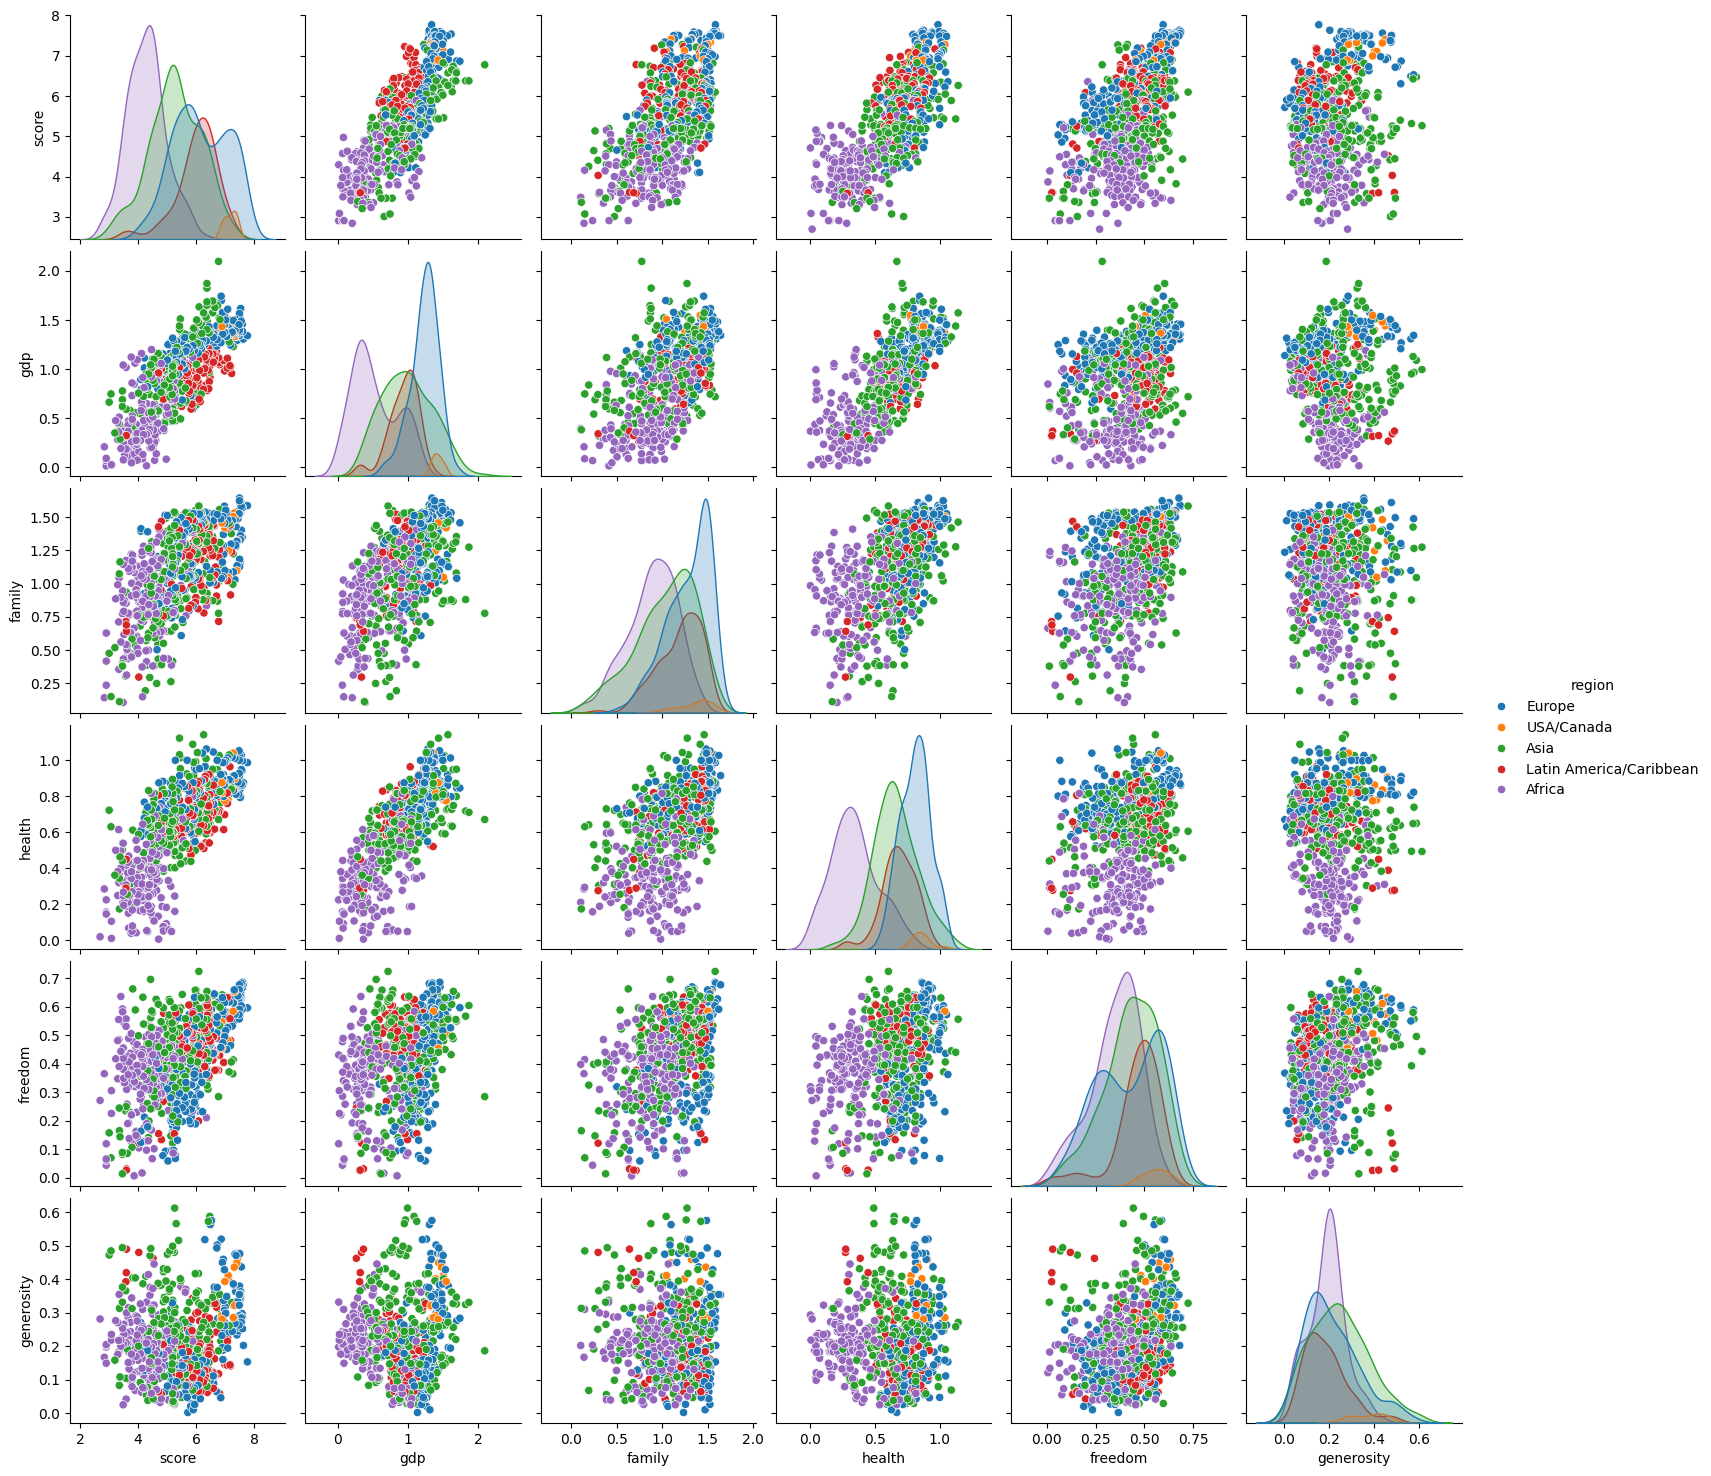

In [7]:
sns.pairplot(df_na, vars=['score', 'gdp', 'family', 'health', 'freedom', 'generosity'], hue='region');

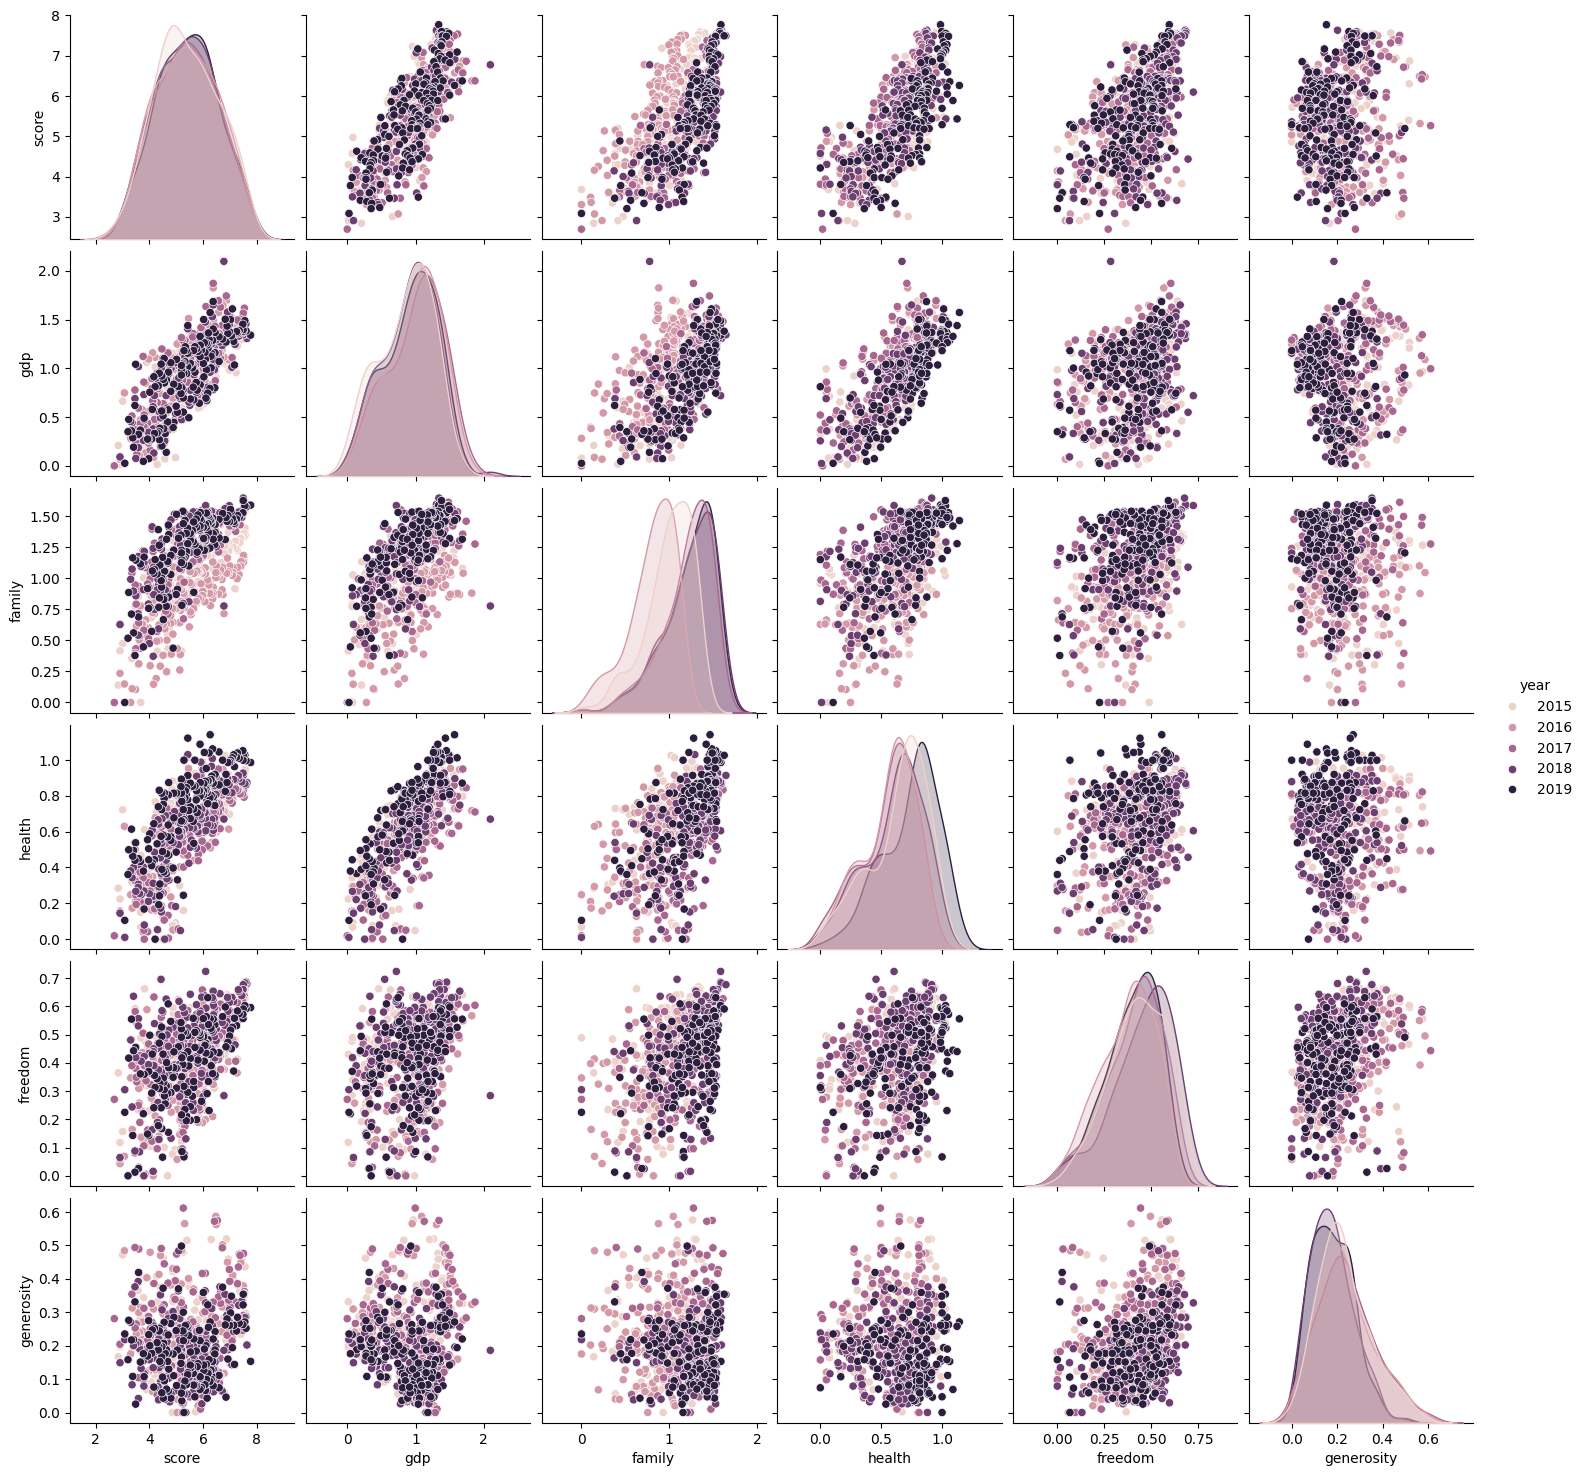

In [8]:
df_NorthAmerica = df_na[df_na['region']=='USA/Canada']
sns.pairplot(df, vars=['score', 'gdp', 'family', 'health', 'freedom', 'generosity'], hue='year');

# Linear models
First linear model without interactions, on the North American data

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('score ~ year + family + freedom + health + generosity + gdp', df_NorthAmerica).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     28.23
Date:                Thu, 30 Oct 2025   Prob (F-statistic):            0.00984
Time:                        10:16:48   Log-Likelihood:                 22.487
No. Observations:                  10   AIC:                            -30.97
Df Residuals:                       3   BIC:                            -28.85
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -178.7454     68.867     -2.596      0.081    -397.911      40.420
year           0.0913      0.034      2.648      0.077      -0.018       0.201
family        -0.5375      0.163     -3.291      0.046      -1.057      -0.018
freedom        1.9376      0.581      3.337      0.044       0.090       3.785
health         0.9781      0.352      2.783      0.069      -0.141       2.097
generosity     2.5468      0.839      3.034      0.056      -0.125       5.218
gdp           -0.2277      0.593     -0.384      0.727      -2.114       1.659
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   2.519
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.099
Skew:                          -0.189   Prob(JB):                        0.952
Kurtosis:                       3.305   Cond. No.                     9.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## PCA
Build a DF with the principal components and quantitative variables.

In [10]:
quantitative_variables = df.describe().columns.tolist()

In [11]:
from sklearn.decomposition import PCA

truly_quantitative_variables = [col for col in quantitative_variables if col != 'year'] # year is more an ordinal variable than a quantitative one
projected_data = PCA().fit_transform(df[truly_quantitative_variables])

components = [f'component {i+1}' for i in range(projected_data.shape[1])]
projected_data = pd.DataFrame(projected_data, index=df.index, columns=components)
projected_data = pd.concat((projected_data, df[quantitative_variables]), axis=1)
projected_data

component 1  component 2  component 3  component 4  component 5  \
0       2.290419    -0.250362     0.024482     0.043369     0.076485   
1       2.250322    -0.274076     0.115637     0.080219     0.106092   
2       2.206392    -0.285221     0.087483     0.008950     0.079476   
3       2.235991    -0.227681    -0.019880    -0.028870     0.124556   
4       2.111742    -0.283731     0.044979     0.041416     0.142537   
..           ...          ...          ...          ...          ...   
707    -2.065105     0.368442     0.300110     0.149336    -0.157484   
708    -2.119288     0.113032    -0.024234     0.307915     0.273059   
709    -2.176898     0.303936     0.014639     0.144336     0.216598   
710    -2.357471    -0.003049    -0.202383     0.067551    -0.198790   
711    -2.677245    -0.592352    -0.256605    -0.002360    -0.008810   

     component 6  year  score      gdp   family   health  freedom  generosity  
0      -0.021937  2015  7.587  1.39651  1.34951  0.94143  0.66557     0.29678  
1       0.121152  2015  7.561  1.30232  1.40223  0.94784  0.62877     0.43630  
2       0.023256  2015  7.527  1.32548  1.36058  0.87464  0.64938     0.34139  
3       0.012695  2015  7.522  1.45900  1.33095  0.88521  0.66973     0.34699  
4       0.125714  2015  7.427  1.32629  1.32261  0.90563  0.63297     0.45811  
..           ...   ...    ...      ...      ...      ...      ...         ...  
707     0.060586  2019  3.380  0.28700  1.16300  0.46300  0.14300     0.10800  
708    -0.118710  2019  3.334  0.35900  0.71100  0.61400  0.55500     0.21700  
709     0.019505  2019  3.231  0.47600  0.88500  0.49900  0.41700     0.27600  
710     0.100455  2019  3.203  0.35000  0.51700  0.36100  0.00000     0.15800  
711    -0.023240  2019  3.083  0.02600  0.00000  0.10500  0.22500     0.23500  

[712 rows x 13 columns]

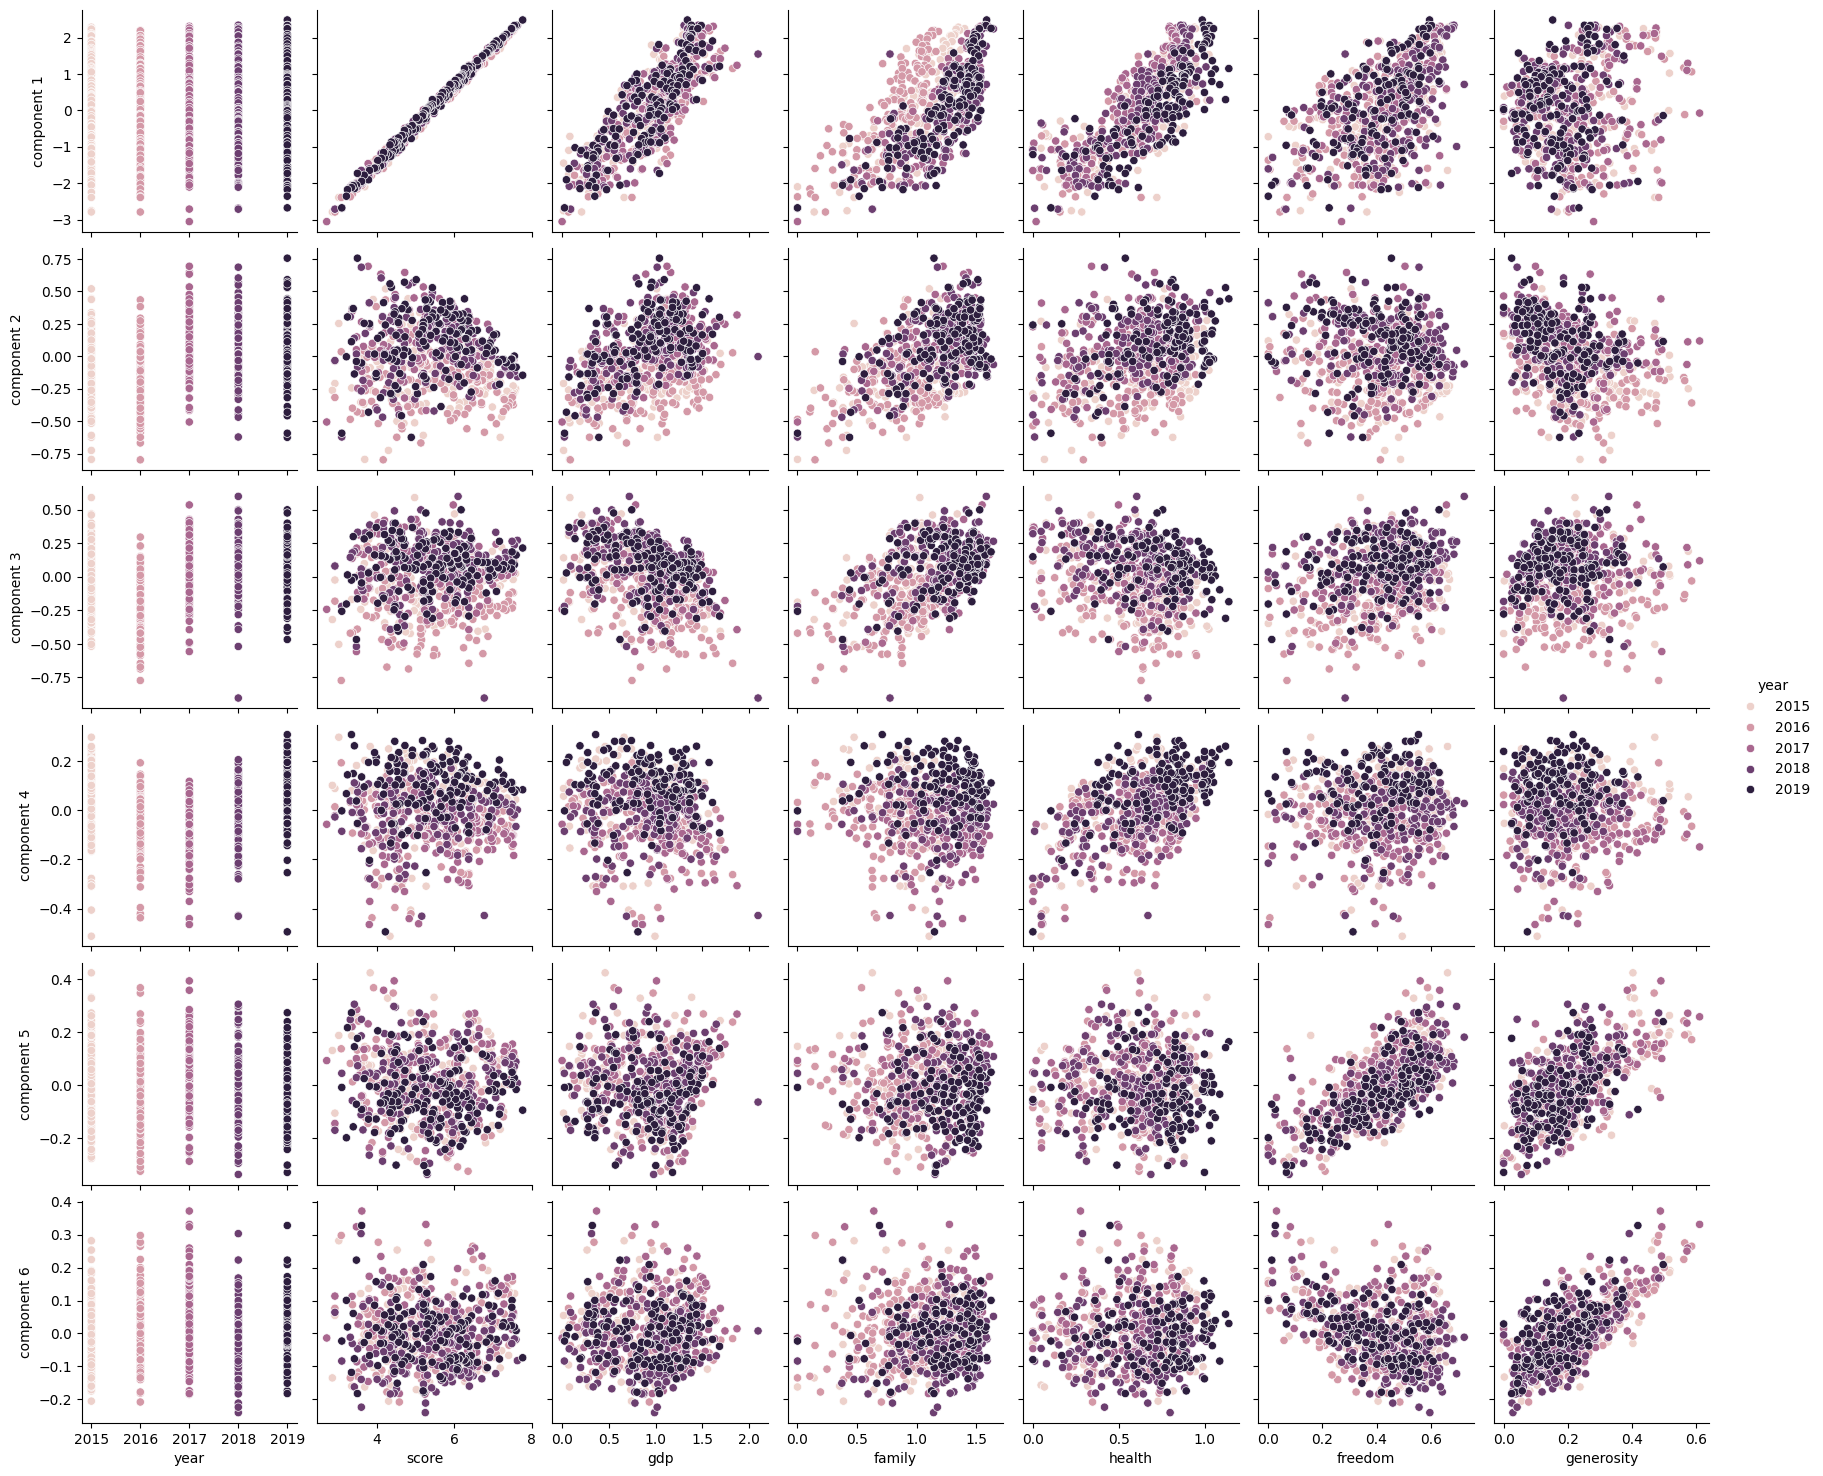

In [12]:
sns.pairplot(projected_data, hue='year', x_vars=quantitative_variables, y_vars=components);

## Scree plot

Draw a scree plot to select a number of components.

Run the PCA with the maximum likelihood estimator technique to automatically select components.

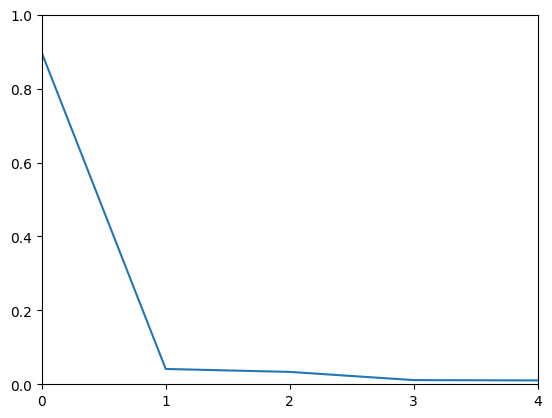

In [13]:
pca = PCA(n_components='mle').fit(df[truly_quantitative_variables])
ax = sns.lineplot(pca.explained_variance_ratio_)
ax.set_ylim([0, 1])
ax.set_xlim([0, pca.n_components_ - 1])
ax.set_xticks(range(pca.n_components_));

# UMAP

*umap-learn* is now listed in the *requirements.txt* file. Just in case:

In [ ]:
!"{sys.executable}" -m pip install --upgrade umap-learn

Carry out a 2D UMAP transform with whatever parameter values (*e.g.* 10 neighbors and unit minimum distance).

Plot the UMAP-projected points colored by region and score.

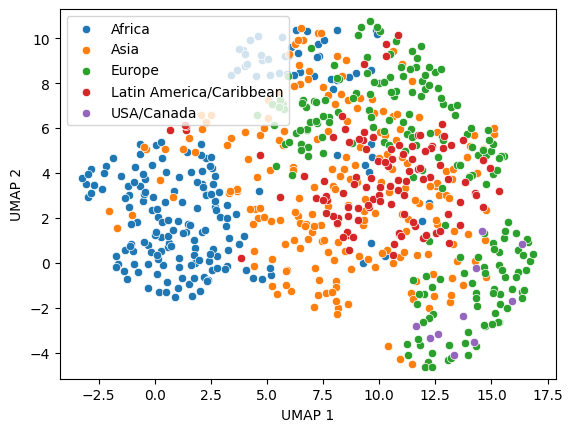

In [15]:
import umap

from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(df[truly_quantitative_variables])

umap_projected_data = umap.UMAP(
    n_neighbors=10,
    min_dist=1.,
).fit_transform(scaled_data)

for region in np.unique(df['region']):
    region_data = umap_projected_data[df['region'] == region, :]
    ax = sns.scatterplot(
        x=region_data[:, 0],
        y=region_data[:, 1],
        label=region,
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');

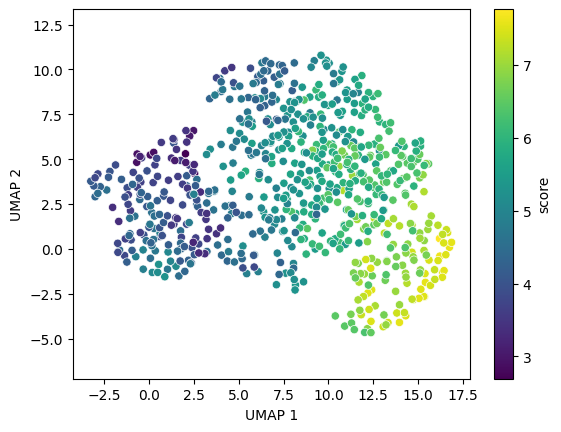

In [16]:
ax = sns.scatterplot(
    x=umap_projected_data[:, 0],
    y=umap_projected_data[:, 1],
    c=df['score'],
)
plt.colorbar(ax.get_children()[0], label='score')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');

For illustration purpose, we may seek for the set of UMAP parameters that maximizes the separation between two groups.
This can be done by maximizing the Silhouette score:

In [17]:
from sklearn.metrics import silhouette_score

Let us try to highlight the Occident (*USA/Canada* and *Europe*) *vs* rest of the world.

In [18]:
# indicator variables
group1 = (df['region'] == 'USA/Canada') | (df['region'] == 'Europe')
group2 = ~group1

#group1 = (df['region'] == 'Asia')
#group2 = (df['region'] == 'Latin America/Caribbean')

def objective_function(projected_data):
    x = projected_data[group1, :]
    y = projected_data[group2, :]
    score = silhouette_score(np.vstack((x, y)), np.repeat([0, 1], [x.shape[0], y.shape[0]]))
    return score

Find the combination of parameter values that maximizes the above score, using a grid search with neighbor counts 2, 3, 5, 10, 20, 30, 50, 100 and minimum distances 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0.

In [19]:
param_grid = {'n_neighbors': [2, 3, 5, 10, 20, 30, 50, 100], 'min_dist': np.arange(.1, 1.1, .1)}
param_grid

{'n_neighbors': [2, 3, 5, 10, 20, 30, 50, 100],
 'min_dist': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

Run the exhaustive grid search (takes time):

In [20]:
grid_n_neighbors = []
grid_min_dist = []
grid_scores = []

for n_neighbors in param_grid['n_neighbors']:
    for min_dist in param_grid['min_dist']:
        
        embedding = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
        ).fit(scaled_data)
        projected_data = embedding.transform(scaled_data)
        score = objective_function(projected_data)
        
        grid_n_neighbors.append(n_neighbors)
        grid_min_dist.append(min_dist)
        grid_scores.append(score)

grid_results = pd.DataFrame({'n_neighbors': grid_n_neighbors, 'min_dist': grid_min_dist, 'silhouette': grid_scores})
grid_results

n_neighbors  min_dist  silhouette
0             2       0.1    0.070854
1             2       0.2    0.084030
2             2       0.3    0.077032
3             2       0.4    0.094695
4             2       0.5    0.090254
..          ...       ...         ...
75          100       0.6    0.160730
76          100       0.7    0.162058
77          100       0.8    0.161111
78          100       0.9    0.155678
79          100       1.0    0.158756

[80 rows x 3 columns]

Find out which combination works best and plot the projected data again:

In [21]:
best = np.argmax(grid_scores)
best_n_neighbors = grid_n_neighbors[best]
best_min_dist = grid_min_dist[best]

print('n_neighbors:', best_n_neighbors, ', min_dist:', best_min_dist, ', score:', grid_scores[best])

n_neighbors: 50 , min_dist: 0.1 , score: 0.17103448510169983


In [22]:
new_projected_data = umap.UMAP(
    n_neighbors=best_n_neighbors,
    min_dist=best_min_dist,
).fit_transform(scaled_data)

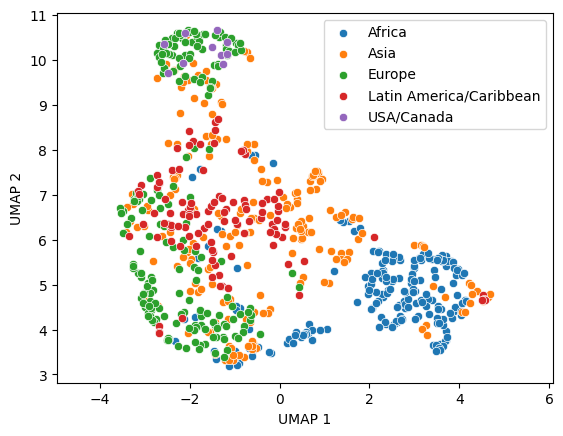

In [23]:
for region in np.unique(df['region']):
    region_data = new_projected_data[df['region'] == region, :]
    ax = sns.scatterplot(
        x=region_data[:, 0],
        y=region_data[:, 1],
        label=region,
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');

# Agglomerative clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

agglomerated_clusters = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(scaled_data)

In [25]:
from scipy.cluster.hierarchy import dendrogram

# copy-pasted from https://scikit-learn.org/1.7/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    return dendrogram(linkage_matrix, **kwargs)

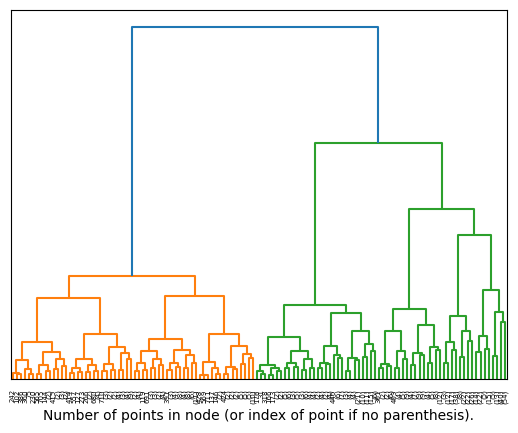

In [26]:
plot_dendrogram(agglomerated_clusters, truncate_mode="level", p=6)
ax = plt.gca()
ax.set_xlabel("Number of points in node (or index of point if no parenthesis).")
ax.set_yticks([]);

# More basic clustering

k-means.

In [27]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10).fit(scaled_data)

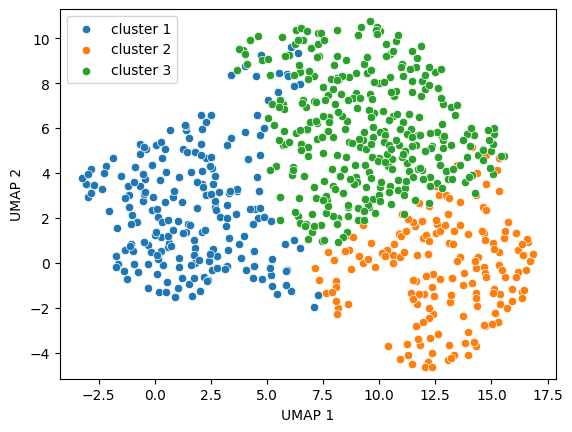

In [28]:
for cluster in range(k_means.n_clusters):
    cluster_data = umap_projected_data[k_means.labels_ == cluster, :]
    ax = sns.scatterplot(
        x=cluster_data[:, 0],
        y=cluster_data[:, 1],
        label=f'cluster {cluster+1}',
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');